# Top Performing Products
- Highlight top-performing products
- Compare sales revenue between product categories

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Loading data

In [2]:
# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from ContosoRetail_df"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='SalesKey')
 
# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\duyvn\AppData\Local\Temp\ipykernel_6592\1552611109.py:2: SyntaxWarning: invalid escape sequence '\S'
  server = 'DESKTOP-D57LVN9\SQLEXPRESS'


### Top performing products by Sales

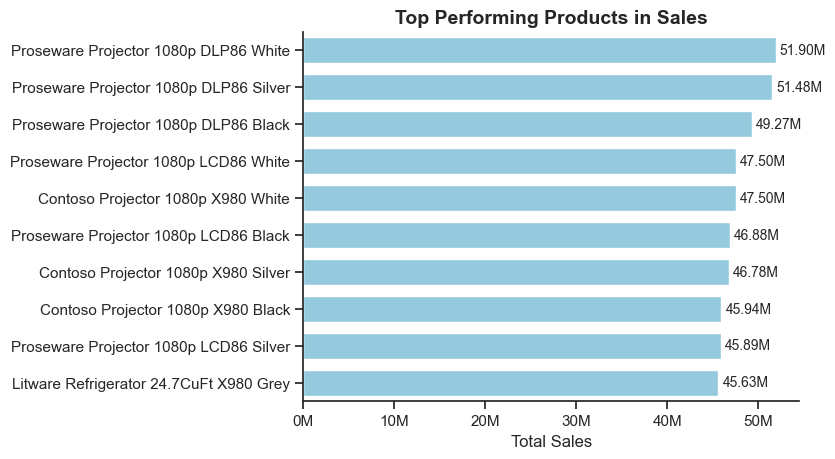

In [3]:
# Extracting data
df_products = df_origin[['ProductName','ProductCategory','SalesAmount']].copy().reset_index().drop(columns='SalesKey')

# Calculation
df_top_products = df_products.groupby('ProductName')['SalesAmount'].sum().to_frame().sort_values(by='SalesAmount', ascending=False).head(10)

# Plotting
sns.set_theme(style='ticks')
sns.barplot(
    data=df_top_products,
    x='SalesAmount',
    y='ProductName',
    color='skyblue',
    width=0.7
)
sns.despine()

# Styling plot
plt.title('Top Performing Products in Sales', fontweight='bold', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))

# Labeling
for i in plt.gca().containers:
    plt.bar_label(i, labels=[f'{x/1000000:.2f}M' for x in i.datavalues], padding=3, fontsize=10)

### Sales revenue between product categories

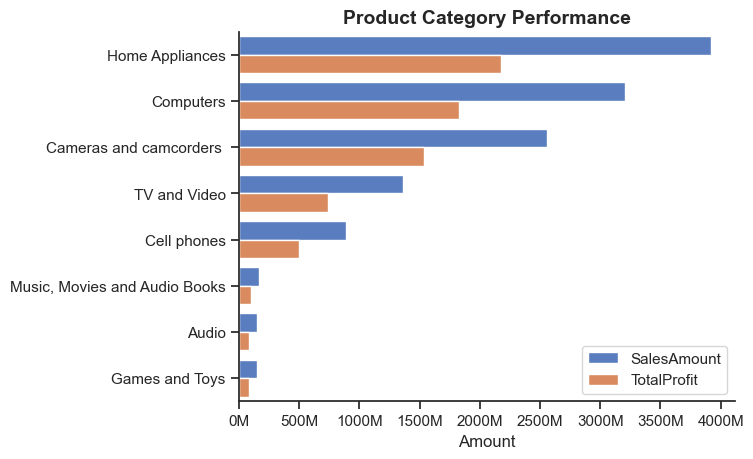

In [4]:
# Extracting data
df_category = df_origin[['ProductCategory','SalesAmount','TotalCost']].copy()

# Calculating
df_category['TotalProfit'] = df_category['SalesAmount'] - df_category['TotalCost']
df_category = df_category.groupby('ProductCategory')[['SalesAmount','TotalProfit']].sum().reset_index().sort_values(by='SalesAmount',ascending=False).melt(id_vars='ProductCategory', var_name='Metrics', value_name='Amount')

# Plotting
sns.set_theme(style='ticks')
sns.barplot(
    data=df_category,
    x='Amount',
    y='ProductCategory',
    hue='Metrics',
    palette='muted'
)
sns.despine()

# Styling plot
plt.title('Product Category Performance', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.legend(title=False)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))

plt.show()

### Profit margin by each category

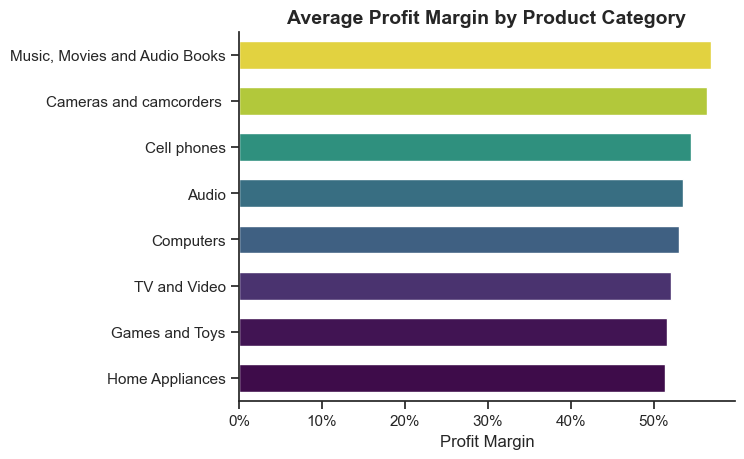

In [5]:
# Extracting data
df_pm = df_origin[['ProductCategory','SalesAmount','TotalCost']].copy()

# Calculating profit margin
df_pm['ProfitMargin'] = ((df_pm['SalesAmount'] - df_pm['TotalCost']) / df_pm['SalesAmount']) * 100

# Plotting profit margin
sns.set_theme(style='ticks')
sns.barplot(
    data=df_pm.groupby('ProductCategory')['ProfitMargin'].mean().to_frame().sort_values(by='ProfitMargin', ascending=False),
    x='ProfitMargin',
    y='ProductCategory',
    hue='ProfitMargin',
    palette='viridis',
    legend=False,
    width=0.6
)
sns.despine()

# Formatting plot
plt.title('Average Profit Margin by Product Category', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xlabel('Profit Margin')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.show()